# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

659

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
firstCity = cities[0]
firstCity

'yellowknife'

In [7]:
# Build query
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city= "Rikitea"
query_url = f"{url}appid={'b9243e2d7b71044b8840d4590278accb'}&q={firstCity}&units={units}"

#Get data
response = requests.get(query_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 62.46, 'lon': -114.35},
 'dt': 1593843875,
 'id': 6185377,
 'main': {'feels_like': 55.38,
          'humidity': 100,
          'pressure': 1010,
          'temp': 57.52,
          'temp_max': 57.99,
          'temp_min': 57.2},
 'name': 'Yellowknife',
 'sys': {'country': 'CA',
         'id': 1007,
         'sunrise': 1593856381,
         'sunset': 1593927028,
         'type': 1},
 'timezone': -21600,
 'visibility': 24140,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 310, 'speed': 8.05}}


In [8]:
response["clouds"]["all"]

90

In [9]:
lats = []
longs = []
temps = []
humids = []
pressures = []
winds = []
clouds = []

citiesFound = []
counter = 0

In [10]:
for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={'b9243e2d7b71044b8840d4590278accb'}&units={units}"
    
    try:
        response = requests.get(url).json()
    
        code = response["cod"]

        if code == 200:  
            citiesFound.append(city)
            lats.append(response["coord"]["lat"])
            longs.append(response["coord"]["lon"])
            temps.append(response["main"]["temp"])
            humids.append(response["main"]["humidity"])
            pressures.append(response["main"]["pressure"])

            winds.append(response["wind"]["speed"])
            clouds.append(response["clouds"]["all"])

        if counter % 50 == 0:
            print(counter)
    
    except Exception as e:
        print(e)
    
    counter += 1
    time.sleep(1)

0
50
100
150
200
250
300
350
400
450
500
550
600
650


In [11]:
counter

659

In [22]:
df = pd.DataFrame()
df["Cities"] = citiesFound
df["Latitude"] = lats
df["Longitude"] = longs
df["Temperature"] = temps
df["Humidity"] = humids
df["Pressure"] = pressures
df["Wind_speed"] = winds
df["Cloudiness"] = clouds

df.head()
df

,Cities,Latitude,Longitude,Temperature,Humidity,Pressure,Wind_speed,Cloudiness
0,yellowknife,62.46,-114.35,57.52,100,1010,8.05,90
1,pisco,-13.70,-76.22,55.06,93,1015,4.70,75
2,guerrero negro,27.98,-114.06,68.29,77,1014,11.72,0
3,victoria,22.29,114.16,88.65,66,1005,10.83,100
4,makakilo city,21.35,-158.09,77.79,69,1015,5.82,75
...,...,...,...,...,...,...,...,...
594,ambilobe,-13.20,49.05,85.41,49,1016,3.49,6
595,yuanping,38.72,112.76,77.23,48,1005,11.27,100
596,bambanglipuro,-7.95,110.28,83.55,62,1009,16.75,0
597,miri,4.41,114.01,91.40,66,1008,6.93,40


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
df

,Cities,Latitude,Longitude,Temperature,Humidity,Pressure,Wind_speed,Cloudiness
0,yellowknife,62.46,-114.35,57.52,100,1010,8.05,90
1,pisco,-13.70,-76.22,55.06,93,1015,4.70,75
2,guerrero negro,27.98,-114.06,68.29,77,1014,11.72,0
3,victoria,22.29,114.16,88.65,66,1005,10.83,100
4,makakilo city,21.35,-158.09,77.79,69,1015,5.82,75
...,...,...,...,...,...,...,...,...
594,ambilobe,-13.20,49.05,85.41,49,1016,3.49,6
595,yuanping,38.72,112.76,77.23,48,1005,11.27,100
596,bambanglipuro,-7.95,110.28,83.55,62,1009,16.75,0
597,miri,4.41,114.01,91.40,66,1008,6.93,40


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
df.describe() 

,Latitude,Longitude,Temperature,Humidity,Pressure,Wind_speed,Cloudiness
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,20.799265,18.665058,69.482304,67.028381,1012.196995,7.923356,50.482471
std,32.719355,88.860502,14.863268,23.231297,6.845250,4.942616,41.448957
min,-54.800000,-179.170000,24.800000,3.000000,993.000000,0.180000,0.000000
25%,-6.195000,-59.040000,58.830000,53.000000,1008.000000,4.180000,1.000000
50%,27.150000,25.230000,71.600000,73.000000,1013.000000,6.930000,57.000000
75%,47.955000,94.595000,80.600000,84.000000,1016.000000,10.580000,93.500000
max,78.220000,179.320000,107.310000,100.000000,1032.000000,26.020000,100.000000


In [25]:
#  Get the indices of cities that have humidity over 100%.

mask = df.Humidity <= 100
df_humid = df.loc[mask].reset_index(drop=True)

df_humid.head()

,Cities,Latitude,Longitude,Temperature,Humidity,Pressure,Wind_speed,Cloudiness
0,yellowknife,62.46,-114.35,57.52,100,1010,8.05,90
1,pisco,-13.70,-76.22,55.06,93,1015,4.70,75
2,guerrero negro,27.98,-114.06,68.29,77,1014,11.72,0
3,victoria,22.29,114.16,88.65,66,1005,10.83,100
4,makakilo city,21.35,-158.09,77.79,69,1015,5.82,75


In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [27]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
df_humid.to_csv("weatherData.csv", index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [28]:
df = pd.read_csv("weatherData.csv")

df.head()

,Cities,Latitude,Longitude,Temperature,Humidity,Pressure,Wind_speed,Cloudiness
0,yellowknife,62.46,-114.35,57.52,100,1010,8.05,90
1,pisco,-13.70,-76.22,55.06,93,1015,4.70,75
2,guerrero negro,27.98,-114.06,68.29,77,1014,11.72,0
3,victoria,22.29,114.16,88.65,66,1005,10.83,100
4,makakilo city,21.35,-158.09,77.79,69,1015,5.82,75


## Latitude vs. Temperature Plot

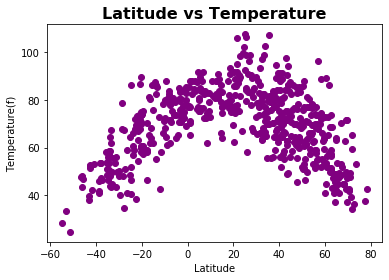

In [37]:
plt.scatter(df.Latitude, df.Temperature, color="purple")
plt.xlabel("Latitude")
plt.ylabel("Temperature" '(f)')
plt.title("Latitude vs Temperature", fontsize=16, fontweight="bold")
plt.show()

## Latitude vs. Humidity Plot

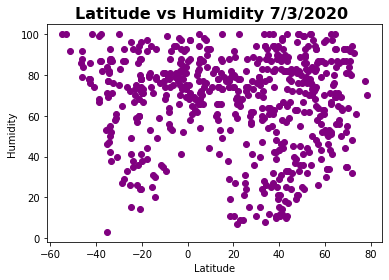

In [41]:
plt.scatter(df.Latitude, df.Humidity, color="Purple")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity 7/3/2020 ", fontsize=16, fontweight="bold")
plt.show()

## Latitude vs. Cloudiness Plot

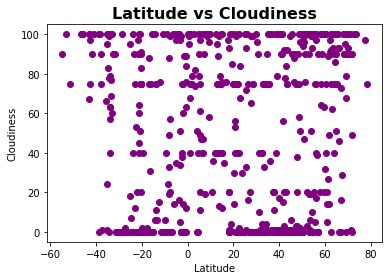

In [44]:
plt.scatter(df.Latitude, df.Cloudiness, color="purple")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness", fontsize=16, fontweight="bold")
plt.show()

## Latitude vs. Wind Speed Plot

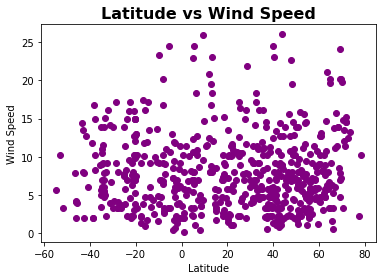

In [47]:
plt.scatter(df.Latitude, df.Wind_speed, color="purple")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed", fontsize=16, fontweight="bold")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [50]:
# Create Northern and Southern Hemisphere DataFrames
northmask= df_humid.Latitude >=0
north_df = df_humid.loc[northmask].reset_index(drop=True)
north_df.describe()

,Latitude,Longitude,Temperature,Humidity,Pressure,Wind_speed,Cloudiness
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,38.812053,14.007852,71.851050,65.816229,1010.577566,7.897112,51.252983
std,19.352332,86.730943,14.499063,23.988676,6.424800,5.026661,41.611647
min,0.130000,-179.170000,34.540000,7.000000,995.000000,0.180000,0.000000
25%,23.370000,-68.265000,62.600000,51.000000,1006.000000,4.380000,1.000000
50%,40.600000,26.690000,73.530000,72.000000,1011.000000,6.930000,58.000000
75%,54.175000,83.200000,82.400000,84.000000,1015.000000,10.505000,95.500000
max,78.220000,179.320000,107.310000,100.000000,1030.000000,26.020000,100.000000


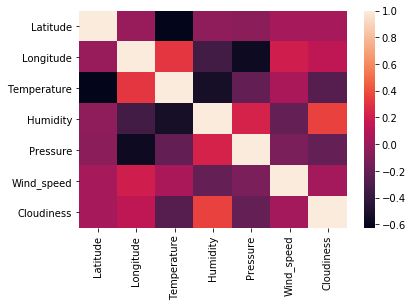

In [56]:
import seaborn as sn
north_corr = north_df.corr()
sn.heatmap(north_corr)

In [52]:
#Southern df
southmask= df_humid.Latitude <0
south_df = df_humid.loc[southmask].reset_index(drop=True)
south_df.describe()

,Latitude,Longitude,Temperature,Humidity,Pressure,Wind_speed,Cloudiness
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,-21.130500,29.506000,63.968389,69.850000,1015.966667,7.984444,48.688889
std,13.210454,92.976091,14.262400,21.160064,6.302345,4.754362,41.127040
min,-54.800000,-175.200000,24.800000,3.000000,993.000000,0.360000,0.000000
25%,-32.627500,-53.465000,52.682500,58.750000,1011.000000,4.000000,0.000000
50%,-20.465000,24.880000,66.145000,75.000000,1015.000000,7.115000,55.000000
75%,-9.602500,129.077500,74.042500,85.250000,1020.000000,10.965000,90.000000
max,-0.600000,177.920000,89.600000,100.000000,1032.000000,24.470000,100.000000


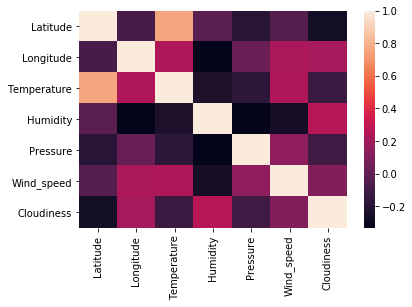

In [57]:
south_corr = south_df.corr()
sn.heatmap(south_corr)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [78]:

#Regression function
def northcharts(x, y):
    x_values = north_df[f'{x}']
    y_values = north_df[f'{y}']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, facecolor='tan')
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.title(f'{x} vs {y} in the North', fontweight='bold')
    print(f"The r-squared is: {rvalue**2}")
    print(f"The p-value is: {pvalue}")
    print(line_eq)
    plt.show()
    
def southcharts(x, y):
    x_values = south_df[f'{x}']
    y_values = south_df[f'{y}']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, facecolor='tan')
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.title(f'{x} vs {y} in the South', fontweight='bold')
    print(f"The r-squared is: {rvalue**2}")
    print(f"The p-value is: {pvalue}")
    print(line_eq)
    plt.show()

The r-squared is: 0.39362769646010787
The p-value is: 3.1163216902091063e-47
y = -0.47x + 90.09


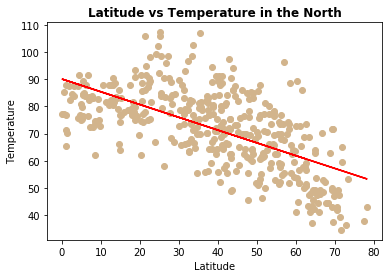

In [76]:
northcharts('Latitude', 'Temperature')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5855693901084577
The p-value is: 6.979944986148725e-36
y = 0.83x + 81.43


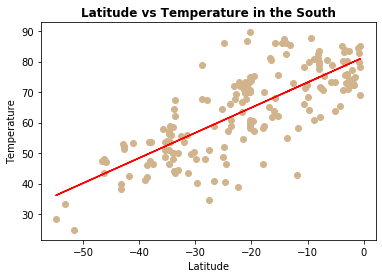

In [79]:
southcharts('Latitude', 'Temperature')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0013909632099422876
The p-value is: 0.44641426357963554
y = -0.05x + 67.61


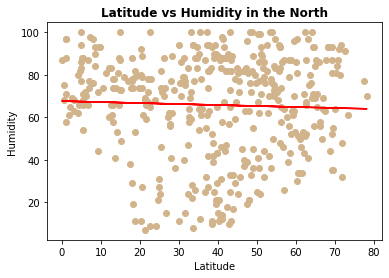

In [80]:
northcharts('Latitude', 'Humidity')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00029940091157458634
The p-value is: 0.8176668904004064
y = -0.03x + 69.26


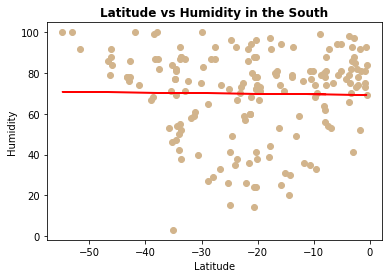

In [81]:
southcharts('Latitude', 'Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0017662577482977764
The p-value is: 0.3908495246661039
y = 0.09x + 47.75


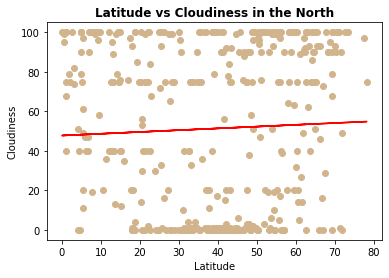

In [82]:
northcharts('Latitude', 'Cloudiness')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0682954712694265
The p-value is: 0.0003948247696316398
y = -0.81x + 31.5


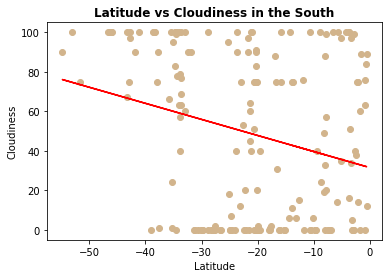

In [83]:
southcharts('Latitude', 'Cloudiness')


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0020230969787551666
The p-value is: 0.3584050424270664
y = 0.01x + 7.44


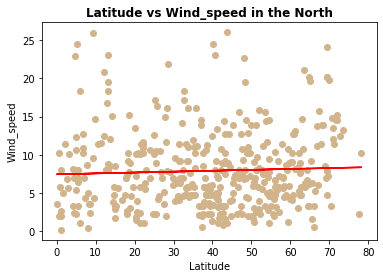

In [85]:
northcharts('Latitude', 'Wind_speed')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001484357898087136
The p-value is: 0.6076096779488749
y = -0.01x + 7.69


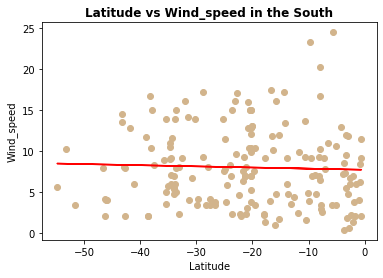

In [86]:
southcharts('Latitude', 'Wind_speed')
